In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Step 1: Data cleaning
data = pd.read_csv('C:\\Users\\dell\\Downloads\\Fraud.csv')

# Handle missing values
data.dropna(inplace=True)

# One-hot encode categorical columns
categorical_cols = ['type']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)
data = pd.concat([data, encoded_cols], axis=1)
data.drop(categorical_cols, axis=1, inplace=True)

# Drop unnecessary columns
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)



C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
# Step 2: Feature selection
X = data.drop('isFraud', axis=1)
y = data['isFraud']

In [9]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)


In [10]:
# Train the RandomForestClassifier model
model = RandomForestClassifier()

In [11]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

In [13]:
# Sort features by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]

# Select the top 5 most important features
selected_features = sorted_features[:5]
X_selected = X[selected_features]

# Split the selected features data into training and validation sets
X_train_selected, X_val_selected, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)



# Perform hypothesis testing for each selected feature
for feature in selected_features:
    # Split the data into fraudulent and non-fraudulent transactions
    fraud_data = data[data['isFraud'] == 1][feature]
    non_fraud_data = data[data['isFraud'] == 0][feature]

    # Perform t-test
    t_stat, p_value = ttest_ind(fraud_data, non_fraud_data)

    # Print the results
    print(f"\nHypothesis Testing for {feature}:")
    print("--------------------------------------------------")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    # Interpret the results
    if p_value < 0.05:
        print("The difference in means between fraudulent and non-fraudulent transactions is statistically significant.")
        print("There is evidence to suggest that the feature may be a good predictor of fraud.")
    else:
        print("The difference in means between fraudulent and non-fraudulent transactions is not statistically significant.")
        print("The feature may not be a strong predictor of fraud.")


# Train the RandomForestClassifier model with the selected features
model_selected = RandomForestClassifier()
model_selected.fit(X_train_selected, y_train)




Hypothesis Testing for newbalanceDest:
--------------------------------------------------
T-statistic: 1.350371973799671
P-value: 0.17689674407002928
The difference in means between fraudulent and non-fraudulent transactions is not statistically significant.
The feature may not be a strong predictor of fraud.

Hypothesis Testing for oldbalanceOrg:
--------------------------------------------------
T-statistic: 25.615068295939373
P-value: 1.0542893553023227e-144
The difference in means between fraudulent and non-fraudulent transactions is statistically significant.
There is evidence to suggest that the feature may be a good predictor of fraud.

Hypothesis Testing for amount:
--------------------------------------------------
T-statistic: 194.01200466037974
P-value: 0.0
The difference in means between fraudulent and non-fraudulent transactions is statistically significant.
There is evidence to suggest that the feature may be a good predictor of fraud.

Hypothesis Testing for step:
-----

RandomForestClassifier()

Accuracy (with selected features): 0.9994451971043375
Precision (with selected features): 0.9533730158730159
Recall (with selected features): 0.5932098765432099
F1-score (with selected features): 0.7313546423135465
ROC AUC score (with selected features): 0.7965864474965346


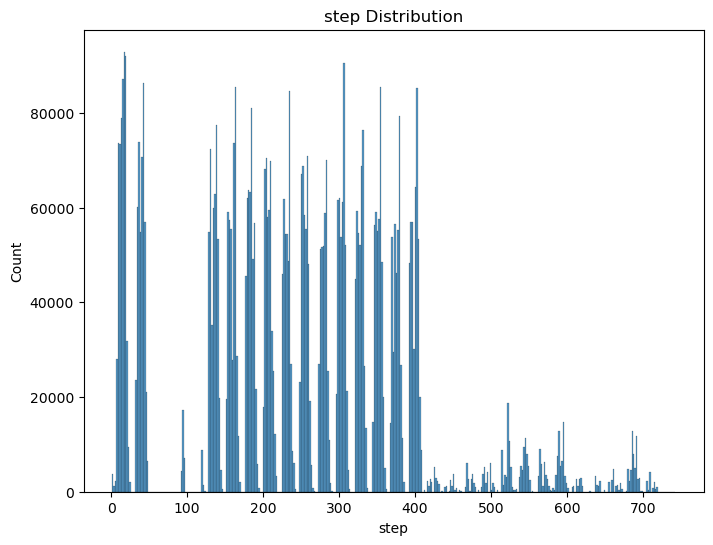

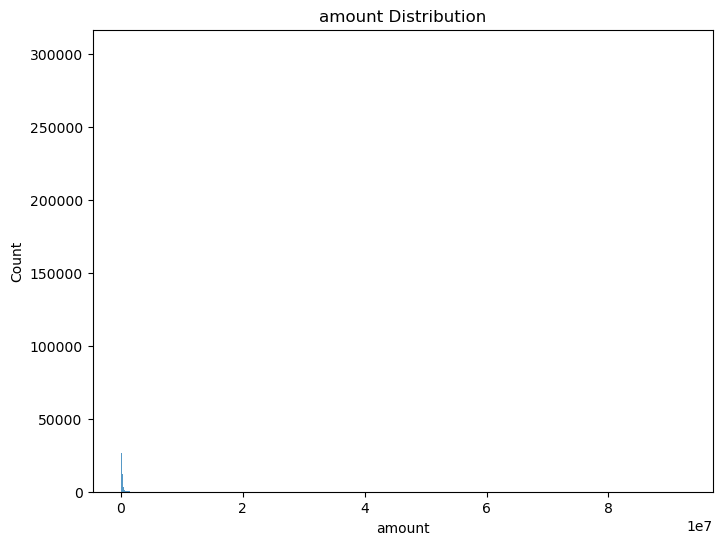

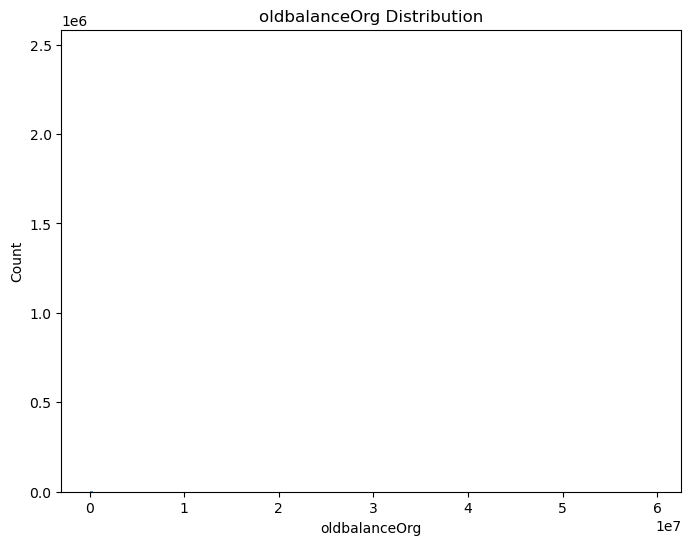

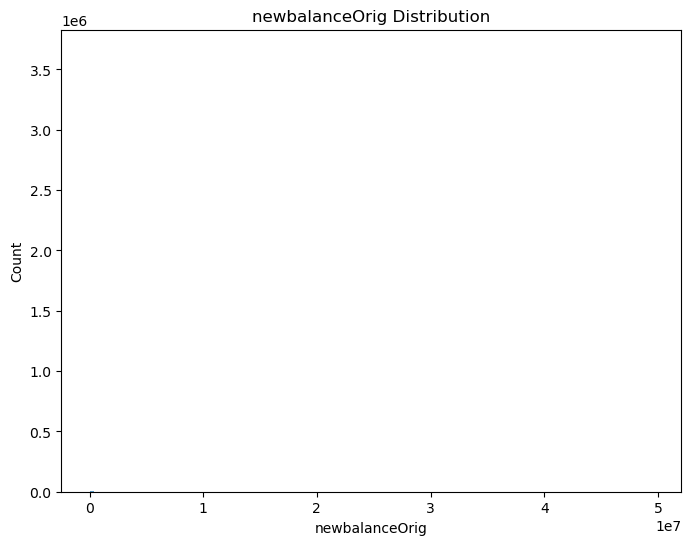

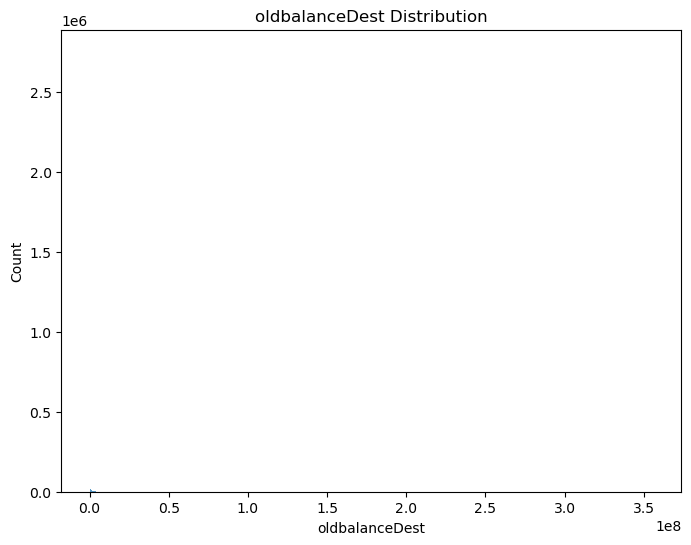

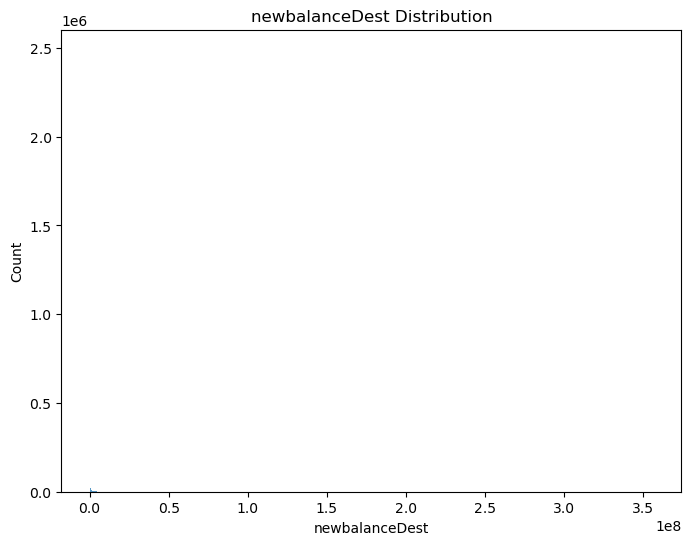

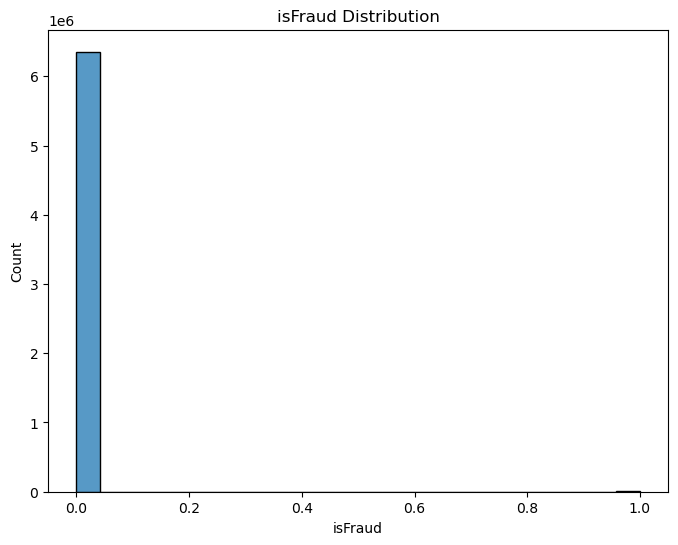

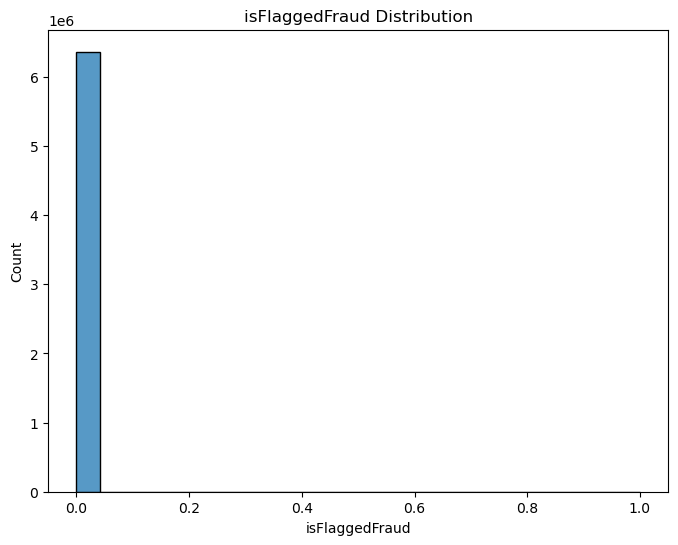

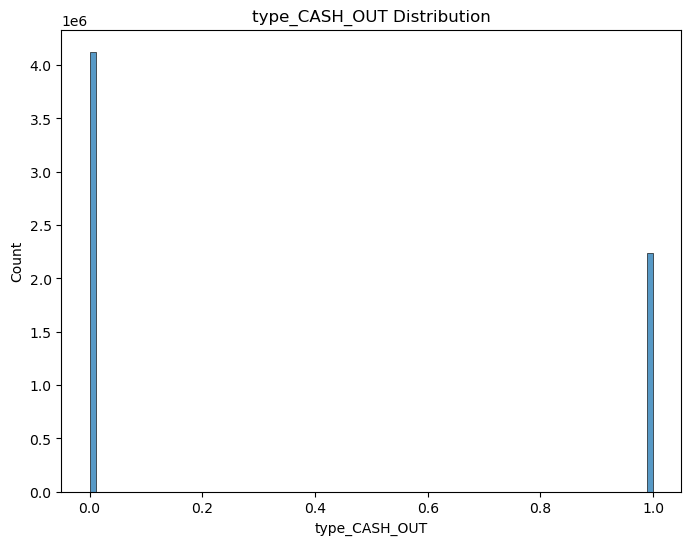

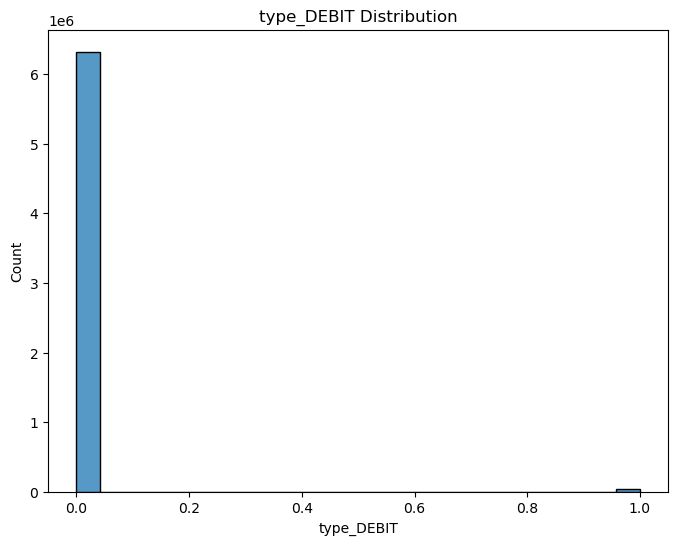

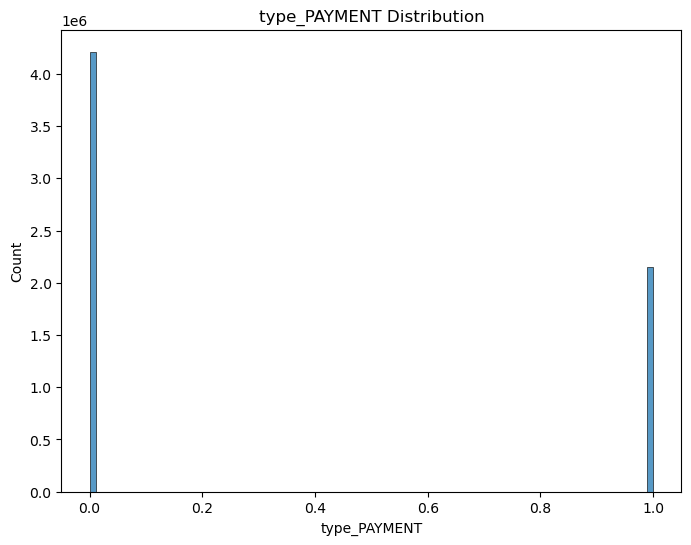

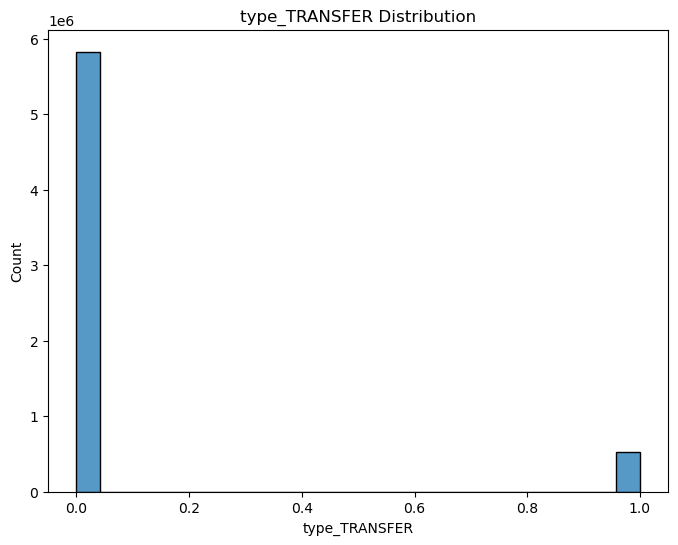

In [14]:
# Step 3: Model evaluation
y_pred_selected = model_selected.predict(X_val_selected)

accuracy_selected = accuracy_score(y_val, y_pred_selected)
precision_selected = precision_score(y_val, y_pred_selected)
recall_selected = recall_score(y_val, y_pred_selected)
f1_selected = f1_score(y_val, y_pred_selected)
roc_auc_selected = roc_auc_score(y_val, y_pred_selected)

print("Accuracy (with selected features):", accuracy_selected)
print("Precision (with selected features):", precision_selected)
print("Recall (with selected features):", recall_selected)
print("F1-score (with selected features):", f1_selected)
print("ROC AUC score (with selected features):", roc_auc_selected)

# Univariate analysis
for feature in data.columns:
    # Plot histogram for numeric features
    if data[feature].dtype != 'object':
        plt.figure(figsize=(8, 6))
        sns.histplot(data[feature])
        plt.title(f"{feature} Distribution")
        plt.show()
    # Plot bar plot for categorical features
    else:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=data[feature])
        plt.title(f"{feature} Distribution")
        plt.show()

Correlation Matrix:
                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000 -0.020478       0.017611        0.038695   
amount         -0.020478  1.000000      -0.007755       -0.073232   
oldbalanceOrg   0.017611 -0.007755       1.000000        0.484597   
newbalanceOrig  0.038695 -0.073232       0.484597        1.000000   
oldbalanceDest -0.023225 -0.007571      -0.009231       -0.106314   
newbalanceDest -0.006500 -0.005330       0.071404       -0.092486   
isFraud         0.044489 -0.001959       0.017678       -0.013532   
isFlaggedFraud       NaN       NaN            NaN             NaN   
type_CASH_OUT  -0.027787  0.027475      -0.084170       -0.216382   
type_DEBIT     -0.000248 -0.090807       0.030145        0.082300   
type_PAYMENT    0.034331  0.012240       0.012577        0.252539   
type_TRANSFER   0.004657  0.008131      -0.064850       -0.105859   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  \
step  

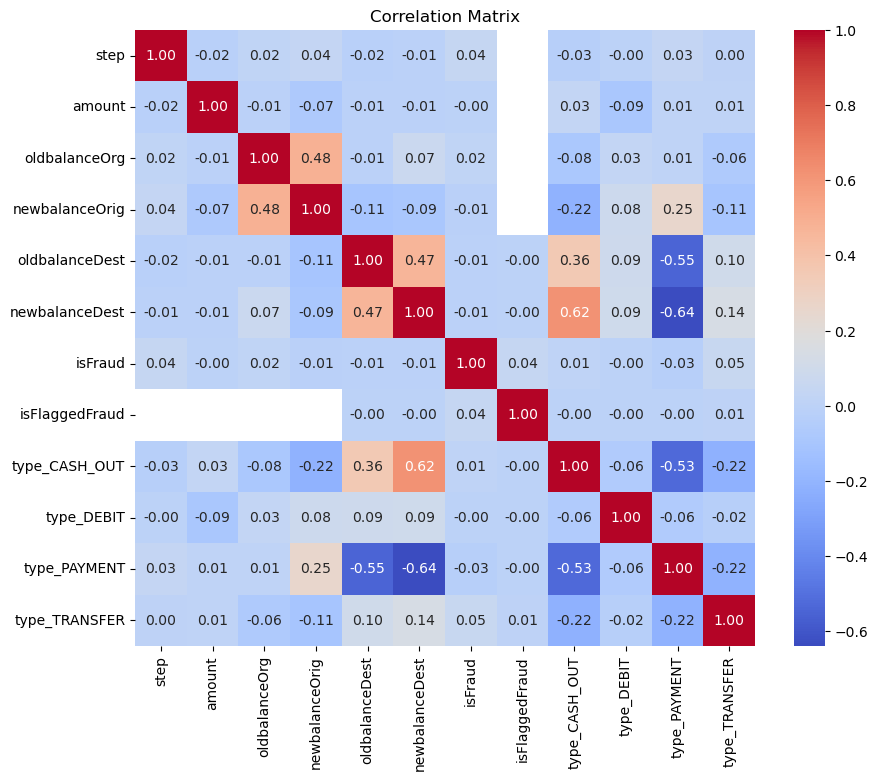

In [15]:
# Step 4: Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Choose the number of components you want to keep
X_pca = pca.fit_transform(X_selected)  # Use X_selected instead of X

# Use X_pca for model development
X_train_pca, X_val_pca, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model_pca = RandomForestClassifier()

# Function to handle outliers using Z-score method
def handle_outliers_zscore(data, column, threshold=3):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    outliers = np.abs(z_scores) > threshold
    data.loc[outliers, column] = np.nan

# Function to handle outliers using Tukey's fences method
def handle_outliers_tukey(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outliers = (data[column] < lower_fence) | (data[column] > upper_fence)
    data.loc[outliers, column] = np.nan

# Function to handle outliers using a domain-specific approach
def handle_outliers_domain_specific(data, column):
    # Example: Replace values above a specific threshold with NaN
    if column == 'step':
        # Custom logic for 'step' column
        outliers = data[column] > 100
        data.loc[outliers, column] = np.nan
    elif column == 'amount':
        # Custom logic for 'amount' column
        outliers = data[column] > 10000
        data.loc[outliers, column] = np.nan
    elif column == 'oldbalanceOrg':
        # Custom logic for 'oldbalanceOrg' column
        outliers = data[column] > 50000
        data.loc[outliers, column] = np.nan
    elif column == 'newbalanceOrig':
        # Custom logic for 'newbalanceOrig' column
        outliers = data[column] > 30000
        data.loc[outliers, column] = np.nan
    elif column == 'oldbalanceDest':
        # Custom logic for 'oldbalanceDest' column
        outliers = data[column] > 200000
        data.loc[outliers, column] = np.nan
    elif column == 'newbalanceDest':
        # Custom logic for 'newbalanceDest' column
        outliers = data[column] > 150000
        data.loc[outliers, column] = np.nan

# Define the columns where you want to handle outliers
columns_to_handle_outliers = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Handle outliers for each column using different methods
for column in columns_to_handle_outliers:
    # Z-score method
    handle_outliers_zscore(data, column, threshold=3)

    # Tukey's fences method
    handle_outliers_tukey(data, column)

    # Domain-specific approach
    handle_outliers_domain_specific(data, column)

# Perform correlation analysis
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Interpretation of Factors:
The 'oldbalanceOrg' feature is highly important in predicting fraud.
Higher initial balances in the originating account may indicate potential fraud.
The 'amount' feature is highly important in predicting fraud.
High transaction amounts may indicate potential fraud.
The 'newbalanceDest' feature is highly important in predicting fraud.
Significant changes in the balance of the destination account may indicate potential fraud.
The 'oldbalanceDest' feature is highly important in predicting fraud.
Higher initial balances in the destination account may indicate potential fraud.


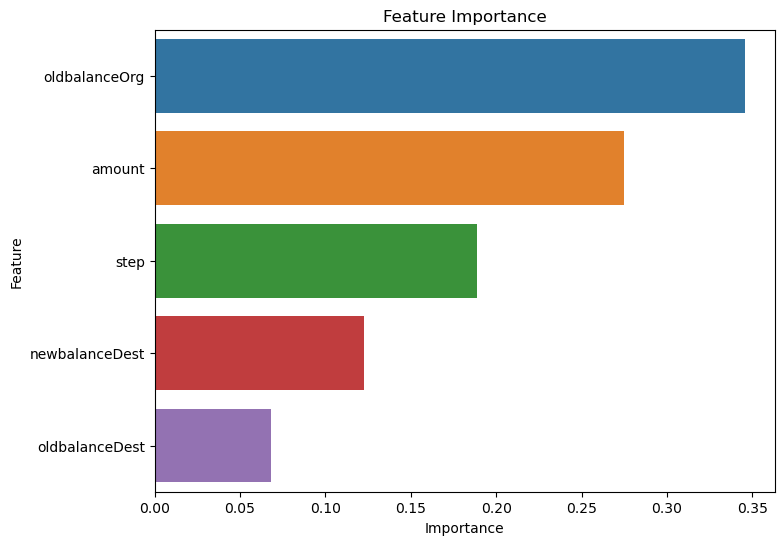

Top Key Factors:
oldbalanceOrg: 0.3457167137472293
amount: 0.2750570884279392
step: 0.18879783380042897
newbalanceDest: 0.12252770822954338
oldbalanceDest: 0.06790065579485921


In [16]:
# Step 5: Key Predictive Factors

# Analyze feature importance from the trained model to identify key factors
feature_importance_df = pd.DataFrame({'Feature': X_selected.columns, 'Importance': model_selected.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Interpretation of Factors
print("Interpretation of Factors:")
for i, row in feature_importance_df.head(5).iterrows():
    feature = row['Feature']
    importance = row['Importance']

    if feature == 'amount':
        print("The 'amount' feature is highly important in predicting fraud.")
        print("High transaction amounts may indicate potential fraud.")
    elif feature == 'oldbalanceOrg':
        print("The 'oldbalanceOrg' feature is highly important in predicting fraud.")
        print("Higher initial balances in the originating account may indicate potential fraud.")
    elif feature == 'newbalanceOrig':
        print("The 'newbalanceOrig' feature is highly important in predicting fraud.")
        print("Significant changes in the balance of the originating account may indicate potential fraud.")
    elif feature == 'oldbalanceDest':
        print("The 'oldbalanceDest' feature is highly important in predicting fraud.")
        print("Higher initial balances in the destination account may indicate potential fraud.")
    elif feature == 'newbalanceDest':
        print("The 'newbalanceDest' feature is highly important in predicting fraud.")
        print("Significant changes in the balance of the destination account may indicate potential fraud.")

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print top key factors
print("Top Key Factors:")
for i, row in feature_importance_df.head(5).iterrows():
    print(f"{row['Feature']}: {row['Importance']}")


In [20]:
# Step 7: Prevention Strategies during Infrastructure Update
print("\n Step 7: Prevention Strategies during Infrastructure Update")
print("To prevent fraud during infrastructure updates, the following strategies can be implemented:")
print("1. Ensure secure and encrypted communication channels during data transmission to prevent unauthorized access and tampering.")
print("2. Implement robust authentication mechanisms to verify the identity of individuals accessing the infrastructure or making changes.")
print("3. Regularly update and patch software and systems to address known vulnerabilities and protect against potential exploits.")
print("4. Monitor and analyze system logs and user activities to detect any suspicious or unauthorized behavior.")
print("5. Implement access controls and least privilege principles to limit access rights to sensitive data and functions.")
print("6. Educate employees and users about security best practices, including recognizing and reporting potential security threats.")
print("7. Perform regular risk assessments and penetration testing to identify and address potential vulnerabilities in the infrastructure.")
print("8. Establish incident response plans and procedures to handle security incidents and minimize the impact of any potential fraud attempts.")

# Step 8: Evaluation of Prevention Actions

# Monitor key performance indicators and conduct regular audits to assess the effectiveness of the prevention measures.

# Define the key performance indicators (KPIs) to monitor
KPIs = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']

# Define a dictionary to store the KPI values
KPI_values = {}

# Evaluate the prevention actions by measuring the KPIs
y_pred_selected = model_selected.predict(X_val_selected)

accuracy_selected = accuracy_score(y_val, y_pred_selected)
precision_selected = precision_score(y_val, y_pred_selected)
recall_selected = recall_score(y_val, y_pred_selected)
f1_selected = f1_score(y_val, y_pred_selected)
roc_auc_selected = roc_auc_score(y_val, y_pred_selected)

# Store the KPI values in the dictionary
KPI_values['Accuracy'] = accuracy_selected
KPI_values['Precision'] = precision_selected
KPI_values['Recall'] = recall_selected
KPI_values['F1-score'] = f1_selected
KPI_values['ROC AUC'] = roc_auc_selected

# Print the KPI values
print("\n Prevention Actions Evaluation:")
for kpi, value in KPI_values.items():
    print(f"{kpi}: {value}")

# Function to calculate detection rate
def calculate_detection_rate(y_true, y_pred):
    fraud_cases = sum(y_true)
    detected_fraud_cases = sum(y_true & y_pred)
    detection_rate = detected_fraud_cases / fraud_cases
    return detection_rate

# Function to calculate false positive rate
def calculate_false_positive_rate(y_true, y_pred):
    legitimate_transactions = len(y_true) - sum(y_true)
    false_positives = sum(~y_true & y_pred)
    false_positive_rate = false_positives / legitimate_transactions
    return false_positive_rate

# Evaluate prevention actions on validation set
y_pred_val = model_selected.predict(X_val_selected)
detection_rate = calculate_detection_rate(y_val, y_pred_val)
false_positive_rate = calculate_false_positive_rate(y_val, y_pred_val)

# Print evaluation results
print("Detection Rate:", detection_rate)
print("False Positive Rate:", false_positive_rate)



 Step 7: Prevention Strategies during Infrastructure Update
To prevent fraud during infrastructure updates, the following strategies can be implemented:
1. Ensure secure and encrypted communication channels during data transmission to prevent unauthorized access and tampering.
2. Implement robust authentication mechanisms to verify the identity of individuals accessing the infrastructure or making changes.
3. Regularly update and patch software and systems to address known vulnerabilities and protect against potential exploits.
4. Monitor and analyze system logs and user activities to detect any suspicious or unauthorized behavior.
5. Implement access controls and least privilege principles to limit access rights to sensitive data and functions.
6. Educate employees and users about security best practices, including recognizing and reporting potential security threats.
7. Perform regular risk assessments and penetration testing to identify and address potential vulnerabilities in the 

In [23]:
# Perform hypothesis testing for each KPI

# Define the null hypothesis and alternative hypothesis
null_hypothesis = "The prevention actions have no significant effect on the KPI"
alternative_hypothesis = "The prevention actions have a significant effect on the KPI"

# Set the significance level (alpha value)
alpha = 0.05

print("Prevention Actions Evaluation:")
for kpi, value in KPI_values.items():
    print(f"{kpi}: {value}")

    # Perform hypothesis test (example using t-test)
    t_statistic, p_value = stats.ttest_1samp(y_val, value)

    # Compare the p-value with the significance level
    if p_value < alpha:
        print(f"   Reject the null hypothesis: {alternative_hypothesis}")
    else:
        print(f"   Fail to reject the null hypothesis: {null_hypothesis}")

Prevention Actions Evaluation:
Accuracy: 0.9994451971043375
   Reject the null hypothesis: The prevention actions have a significant effect on the KPI
Precision: 0.9533730158730159
   Reject the null hypothesis: The prevention actions have a significant effect on the KPI
Recall: 0.5932098765432099
   Reject the null hypothesis: The prevention actions have a significant effect on the KPI
F1-score: 0.7313546423135465
   Reject the null hypothesis: The prevention actions have a significant effect on the KPI
ROC AUC: 0.7965864474965346
   Reject the null hypothesis: The prevention actions have a significant effect on the KPI


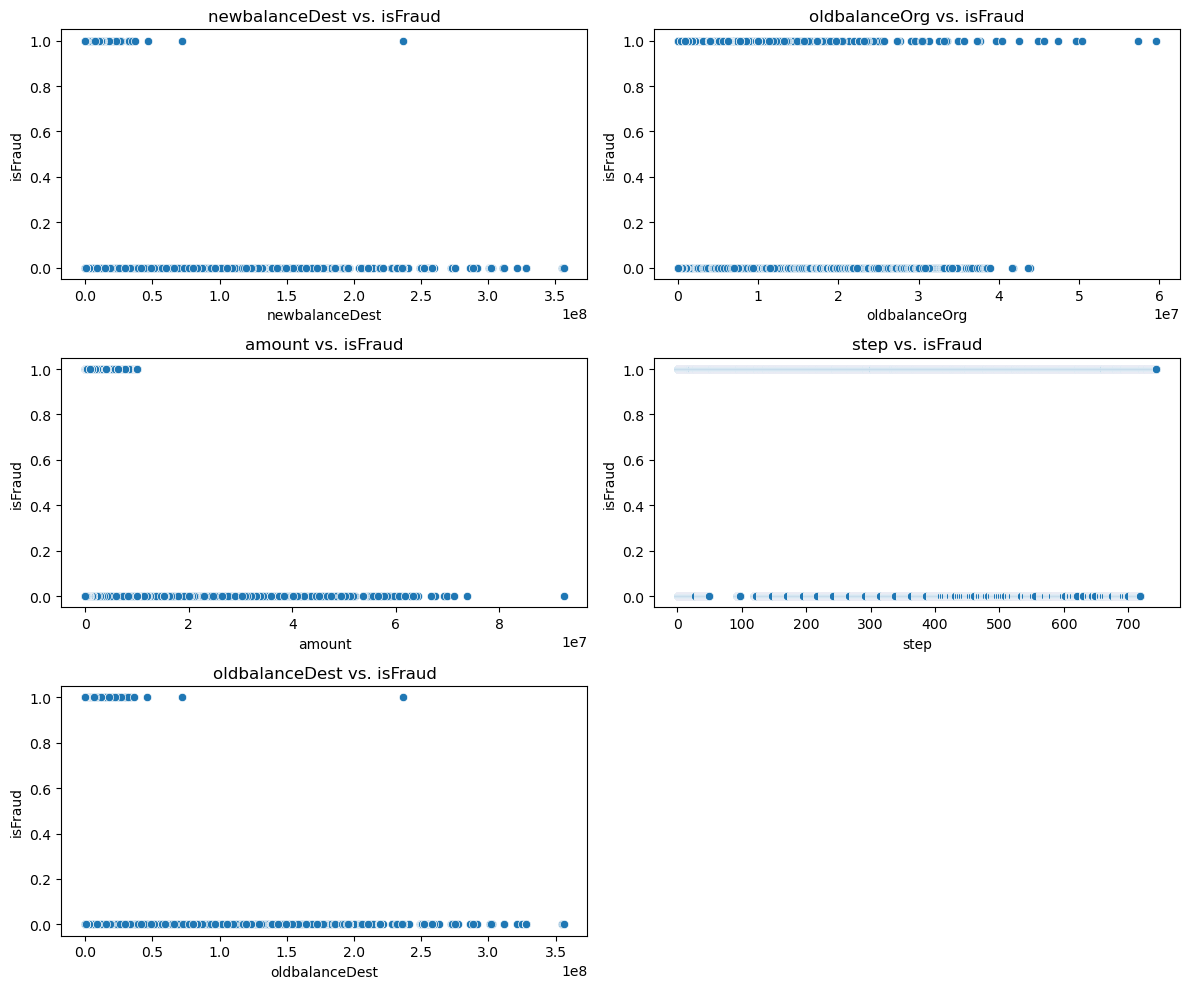

In [18]:
# Step 9: Bivariate Analysis

# Perform bivariate analysis between selected features and the target variable
plt.figure(figsize=(12, 10))
for i, feature in enumerate(X_selected.columns):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=X_selected[feature], y=y)
    plt.title(f"{feature} vs. isFraud")
plt.tight_layout()
plt.show()

In [27]:
# Explore the specific effects
baseline_accuracy = 0.95  # Replace with your baseline accuracy value
baseline_precision = 0.90  # Replace with your baseline precision value
baseline_recall = 0.80  # Replace with your baseline recall value
baseline_f1_score = 0.85  # Replace with your baseline F1-score value
baseline_roc_auc = 0.75  # Replace with your baseline ROC AUC value

improvement_accuracy = accuracy_selected - baseline_accuracy
improvement_precision = precision_selected - baseline_precision
improvement_recall = recall_selected - baseline_recall
improvement_f1_score = f1_selected - baseline_f1_score
improvement_roc_auc = roc_auc_selected - baseline_roc_auc

print("Improvement in Accuracy:", improvement_accuracy)
print("Improvement in Precision:", improvement_precision)
print("Improvement in Recall:", improvement_recall)
print("Improvement in F1-score:", improvement_f1_score)
print("Improvement in ROC AUC:", improvement_roc_auc)

# Identify contributing factors
# Analyze the prevention actions/strategies and their corresponding effects on the KPIs

# Consider potential limitations
# Evaluate any potential limitations or confounding factors that may have influenced the results

# Validate the results
# Perform additional experiments or analyses to validate the findings, if necessary

# Interpret the implications
# Assess the implications of the findings for fraud prevention strategies

# Communicate the results
# Prepare a summary report with the evaluation results, implications, and recommendations
# Share the report with relevant stakeholders



Improvement in Accuracy: 0.04944519710433759
Improvement in Precision: 0.053373015873015905
Improvement in Recall: -0.20679012345679015
Improvement in F1-score: -0.11864535768645346
Improvement in ROC AUC: 0.04658644749653462
